In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\aakar\OneDrive\Desktop\Data Science\Machine Learning\Machine Learning Projects Datasets\car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.shape

(301, 9)

In [7]:
print(data.Fuel_Type.value_counts())
print(data['Seller_Type'].value_counts())
print(data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
# Convert the categorical data to numerical data
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
X=np.array(data.drop(['Car_Name','Selling_Price'],axis=1))
Y=np.array(data['Selling_Price'])

In [11]:
# We are taking small dataset so lets take test size as 20%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [12]:
# Linear Regression Model

In [13]:
lin_model=LinearRegression()

In [14]:
lin_model.fit(X_train,Y_train)

LinearRegression()

In [15]:
# Train Data Prediciton
train_lin_pred=lin_model.predict(X_train)

In [16]:
# R Squared Error
error_score=metrics.r2_score(Y_train,train_lin_pred)
print('R Sqaured Error : ',error_score)

R Sqaured Error :  0.8670919068645729


In [17]:
lin_model.score(X_test,Y_test)

0.9197483209590667

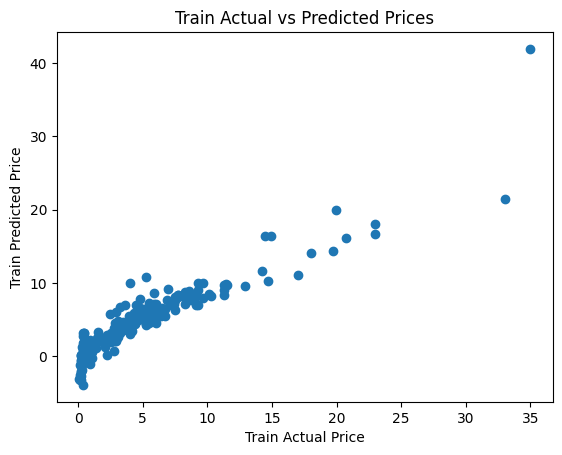

In [18]:
# Visualize Actual and Predicted Price
plt.scatter(Y_train,train_lin_pred)
plt.xlabel('Train Actual Price')
plt.ylabel('Train Predicted Price')
plt.title("Train Actual vs Predicted Prices")
plt.show()

In [19]:
#Test Data Prediction
test_lin_pred=lin_model.predict(X_test)

In [20]:
error_score=metrics.r2_score(Y_test,test_lin_pred)
print("R Sqaured Error : ",error_score)

R Sqaured Error :  0.9197483209590667


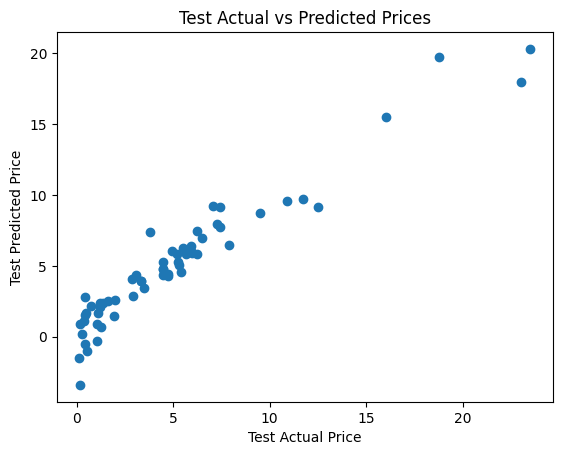

In [21]:
plt.scatter(Y_test,test_lin_pred)
plt.xlabel('Test Actual Price')
plt.ylabel('Test Predicted Price')
plt.title("Test Actual vs Predicted Prices")
plt.show()

In [22]:
# Lasso Regression Model

In [23]:
lasso_model=Lasso()

In [24]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [25]:
# Train Data Prediciton
train_lasso_pred=lasso_model.predict(X_train)

In [26]:
# R Squared Error
error_score=metrics.r2_score(Y_train,train_lasso_pred)
print('R Sqaured Error : ',error_score)

R Sqaured Error :  0.8333087808352386


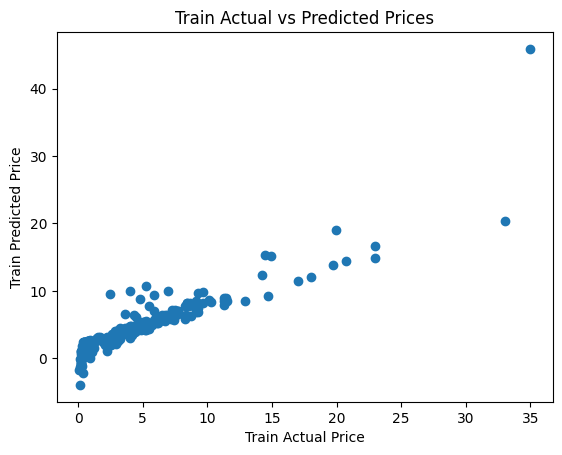

In [27]:
# Visualize Actual and Predicted Price
plt.scatter(Y_train,train_lasso_pred)
plt.xlabel('Train Actual Price')
plt.ylabel('Train Predicted Price')
plt.title("Train Actual vs Predicted Prices")
plt.show()

In [28]:
#Test Data Prediction
test_lasso_pred=lasso_model.predict(X_test)

In [29]:
error_score=metrics.r2_score(Y_test,test_lasso_pred)
print("R Sqaured Error : ",error_score)

R Sqaured Error :  0.8820507285967961


In [30]:
# You can use .score() method too 
lasso_model.score(X_test,Y_test)

0.8820507285967961

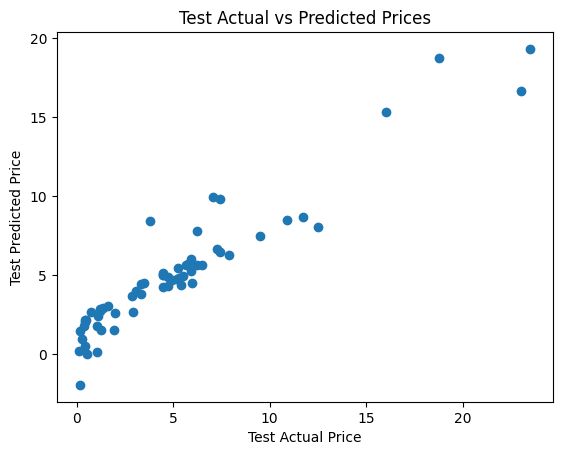

In [31]:
plt.scatter(Y_test,test_lasso_pred)
plt.xlabel('Test Actual Price')
plt.ylabel('Test Predicted Price')
plt.title("Test Actual vs Predicted Prices")
plt.show()

In [32]:
# Prediction System

In [33]:
print("Enter House Details to Predict Rent")
a = int(input("Year :"))
b = float(input("Present Price :"))
c = int(input("Kilometers Driven :"))
d = int(input("Fuel Type (Petrol = 0, Diesel = 1, CNG = 2) :"))
e = int(input("Seller Type (Dealer = 0, Individual = 1) :"))
f = int(input("Transmission (Manual = 0, Automatic = 1) :"))
g = int(input("Owner :"))
features = np.array([[a, b, c, d, e, f, g]])

mod=int(input("Model used for Prediction (Linear Reg = 0, Lasso Reg = 1) :"))
if mod == 0: 
    print("Predicted Car Resale Price = ", lin_model.predict(features))
elif mod == 1:
    print("Predicted Car Resale Price = ", lasso_model.predict(features))
else:
    print("Invalid Choice!!!")

Enter House Details to Predict Rent
Year :2014
Present Price :3.5
Kilometers Driven :27000
Fuel Type (Petrol = 0, Diesel = 1, CNG = 2) :1
Seller Type (Dealer = 0, Individual = 1) :1
Transmission (Manual = 0, Automatic = 1) :1
Owner :0
Model used for Prediction (Linear Reg = 0, Lasso Reg = 1) :1
Predicted Car Resale Price =  [2.77771242]
